# Stock Analysis of Recession Resilient Companies

## Introduction

#### The goal for this code is to find stocks that have been resilient to past major US recessions, analyze what they have in common and use this information to pick which ones are most likely to keep on staying afloat during economic downturns.

In [123]:
from pandas_datareader import data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
%matplotlib inline

In [77]:
#Function to provide financial data when called
def readmydata(tickers, start_date, end_date):
    financial_data = data.DataReader(tickers, 'yahoo', start_date, end_date)
    df = pd.DataFrame(financial_data)
    df.columns
    output = df.stack(level=-1)
    return output

In [78]:
#Function takes as input dataframe and picks columns
def pickmydata(data_pack, attributes, num_days):
    col = data_pack[attributes]
    col.head()
    mytickers_name = data_pack.index.get_level_values('Symbols')
    mytickers_name = mytickers_name.unique()
    for x in mytickers_name:      
        #Query dataframe for the columns user asked for
        data_ticker = data_pack[data_pack.index.get_level_values('Symbols') == x]
        #Object series indexed by date
        data_ticker_attributes = col.loc[:, x]
        #20-day moving average
        short_rolling_tickers = data_ticker_attributes.rolling(window = num_days).mean()
        #Plot num_days referring to how many days are in a unit of rolling average
        fig, ax = plt.subplots(figsize=(9,5))
        ax.plot(data_ticker_attributes.index, data_ticker_attributes, label=x)
        ax.plot(short_rolling_tickers.index, short_rolling_tickers, label= 'Rolling average')
        ax.set_xlabel('Date')
        #Find only requested ticker
        ax.set_ylabel(attributes + ' Price ($)')
        ax.legend()
        output = data_ticker_attributes.describe()
    return output

In [79]:
#Function to calculate daily returns of each stock (Difference/og Price or Log(D/OG))
def stockreturns(data_pack, type_return):
    adjclose = pd.DataFrame(data_pack['Adj Close'])
    adjclose = adjclose.unstack()
    #if loop for log or relative
    if type_return == 'log' or 'logarithm':
        adjclose_ret = np.log(adjclose).diff()
    else:
        adjclose_ret = adjclose.pct_change()
    output = adjclose_ret
    return output

In [80]:
#Cumulative/Daily return plot
def return_plot(dataframe, type_plot):
    if type_plot == 'cumulative':
        cumulative_return = dataframe.cumsum()
        fig = plt.figure()
        ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
        ax1.plot(cumulative_return)
        ax1.set_xlabel('Date')
        ax1.set_ylabel("Cumulative Returns")
        ax1.set_title("Stock Cumulative Returns")
        plt.gcf().autofmt_xdate()
        #ax1.legend()
        plt.show();
    else:
        fig = plt.figure()
        ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
        ax1.plot(dataframe)
        ax1.set_xlabel('Date')
        ax1.set_ylabel("Relative Returns")
        ax1.set_title("Stock Relative Returns")
        plt.gcf().autofmt_xdate()
        #ax1.legend()
        plt.show();

In [155]:
weighted_df = data_plot
ret_total = weighted_df.sum(axis=1)
ret_total

Date
2007-12-03    0.000000
2007-12-04   -0.177895
2007-12-05   -0.025482
2007-12-06    0.018106
2007-12-07    0.065321
                ...   
2009-06-24    0.044554
2009-06-25    0.207802
2009-06-26   -0.031261
2009-06-29    0.044910
2009-06-30    0.108212
Length: 397, dtype: float64

In [165]:
def portfolio_ret(dataframe):
    start_price = [1]
    #Plotting Portfolio Returns
    weighted_df = dataframe
    ret_total = weighted_df.sum(axis=1) + start_price
    fig = plt.figure()
    ax = fig.add_axes([0.1,0.1,0.8,0.8])
    ax.plot(ret_total)
    ax.set_xlabel('Date')
    ax.set_ylabel("Portfolio Returns")
    ax.set_title("Stock Relative Returns")
    plt.gcf().autofmt_xdate()
    plt.show();

    #Placeholding weights, need to calculate them another way, and remove GSPC
    df = dataframe.stack(level=-1)
    df = df.mean(axis=0)
    df = start_price + df
    ret = df.reset_index(drop=True)
    ret = ret.to_string()
    
    #Volatility
    dif = data_pack['Adj Close'] - data_pack['Adj Close'].mean(axis=0)
    square = dif**2
    sum = square.sum() / len(square)
    standard_dev = np.sqrt(sum)
 
    #Sharpe
    adjclose = data_pack['Adj Close']
    adjclose_ret = np.log(adjclose).diff()
    sharpe = data_pack['Adj Close'].mean() / data_pack['Adj Close'].std() 
    
    #Drawdown
    '''
    rolling_max = df.cummax()
    daily_drawdown = df / rolling_max - 1.0
    max_draw = daily_drawdown.cummin()
    '''
    
    #Dataframe
    data = [['Number of Securities in Portfolio', 6], ['Relative Return', ret], 
            ['Annualized return', 'TBD'], ['Volatility', standard_dev], ['Sharpe', sharpe],
            ['Drawdown', 'TBD']]
    output = pd.DataFrame(data, columns=['Portfolio', "John Doe's Portfolio"])
    
    return output

## Resilient Companies

#### Companies that survive recessions tend to have basic necessities needed by consumers. This is because consumer staples and food are always in demand, even during economic downturns. Examples of such companies the likes of Walmart, Kroger and General Mills

In [82]:
data_pack = readmydata(tickers=['^GSPC', 'WMT', 'KR', 'GIS', 'HRL', 'CPB'], start_date='2007-12-01', end_date='2009-06-30')
#data_pack.head(10)

#### Looking at the returns of these companies, we notice that they tent to fare much better during tough financial times compared to their counterparts.

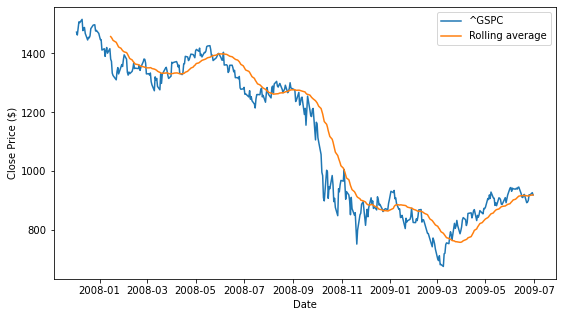

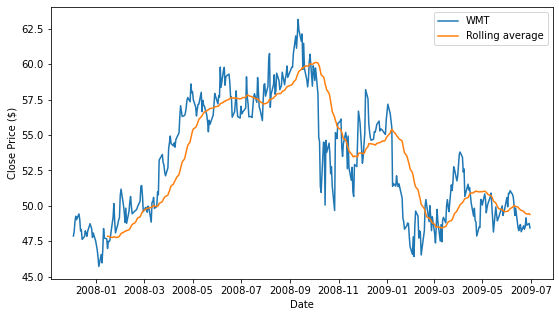

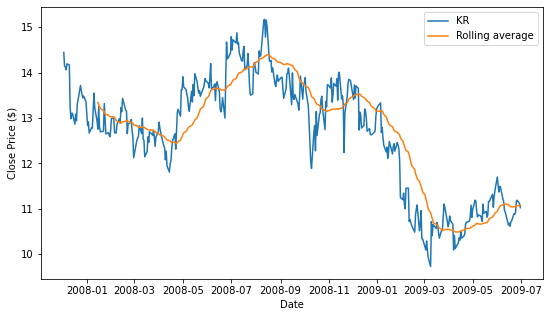

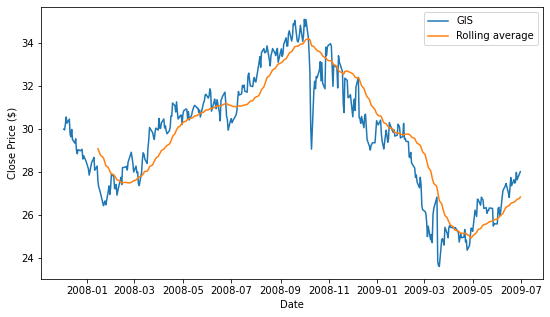

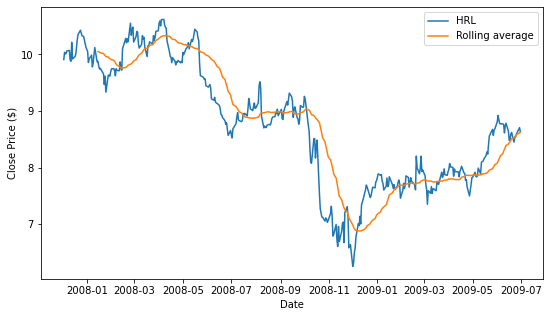

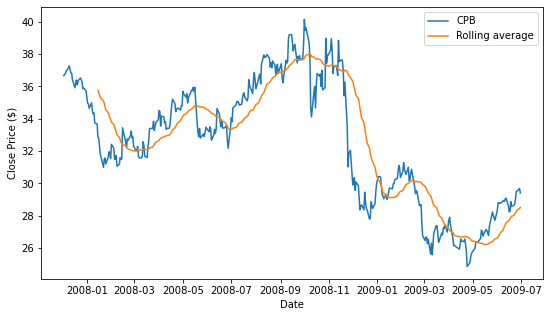

In [83]:
pickmydata(data_pack, "Close", 30)
data_plot = stockreturns(data_pack, 'relative')

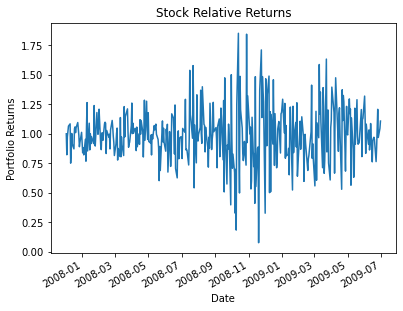

,Portfolio,John Doe's Portfolio
0,Number of Securities in Portfolio,6
1,Relative Return,0 0.998068
2,Annualized return,TBD
3,Volatility,422.136132
4,Sharpe,0.477154
5,Drawdown,TBD


In [166]:
portfolio_ret(data_plot)

#### Calculating returns and visualizing the data. We are able to see a a much more consistent return in the companies deemed resilient than those whose stock price was deemed more volatile.

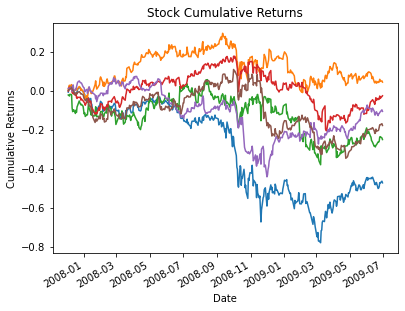

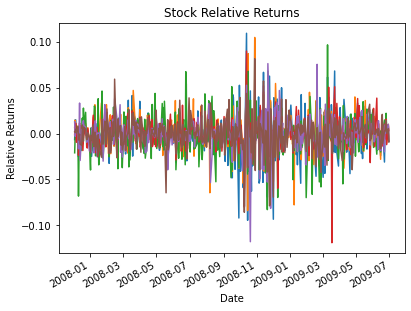

In [85]:
return_plot(data_plot, 'cumulative')
return_plot(data_plot, 'relative')

#### Looking for trends, we can see that retail company stocks would hit a dip during the recession, but the precentage of the dip would be less extreme than that of the S&P.

## Sensitive Companies

#### Companies that tend to perform terribly are those who depend on consumers being able to afford big ticket item, such as cars, housing and plane tickets. The reasons depend on the industry, for example, though the car industry is quickly  becoming a necessity, are quite expensive and that alone makes the demand for them fall during economic downturns.

In [86]:
data_pack = readmydata(tickers=['^GSPC', 'AMT', 'F', 'BA', 'HST', 'AAL'], start_date='2007-12-01', end_date='2009-06-30')

#### In order to understand which future companies are at a greater risk than average during economical downturns, it is important to look back in history and see which industries tend to suffer the most during such events.

In [87]:
data_pack.head(10)

Attributes            Adj Close        Close         High          Low  \
Date       Symbols                                                       
2007-12-03 ^GSPC    1472.420044  1472.420044  1481.160034  1470.079956   
           AMT        36.882504    44.919998    45.619999    44.750000   
           F           4.832798     7.250000     7.520000     7.230000   
           BA         67.270569    91.790001    93.199997    91.660004   
           HST        12.313081    18.766520    18.883993    18.374939   
           AAL        18.788834    19.930000    21.209999    19.820000   
2007-12-04 ^GSPC    1462.790039  1462.790039  1471.339966  1460.660034   
           AMT        34.854458    42.450001    44.389999    42.360001   
           F           4.646152     6.970000     7.240000     6.930000   
           BA         65.951401    89.989998    91.790001    89.849998   

Attributes                 Open        Volume  
Date       Symbols                             
2007-12-03 ^GSPC    1479.630005  3.323250e+09  
           AMT        45.220001  3.452200e+06  
           F           7.520000  3.493680e+07  
           BA         92.500000  5.423400e+06  
           HST        18.580519  3.745738e+06  
           AAL        21.209999  2.127800e+06  
2007-12-04 ^GSPC    1471.339966  3.343620e+09  
           AMT        44.389999  6.066100e+06  
           F           7.200000  5.544510e+07  
           BA         91.430000  7.080900e+06

count    397.000000
mean       7.024861
std        3.975925
min        1.760000
25%        3.600000
50%        6.800000
75%        8.750000
max       19.930000
Name: Close, dtype: float64

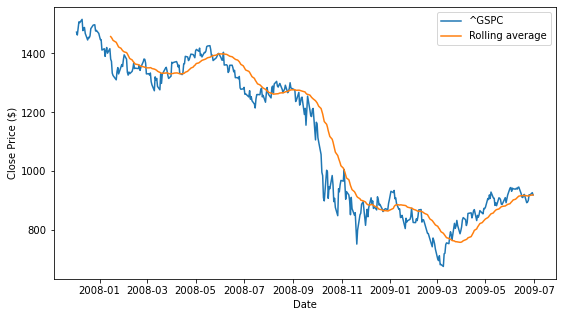

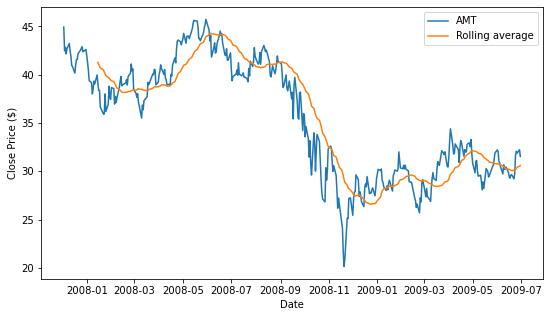

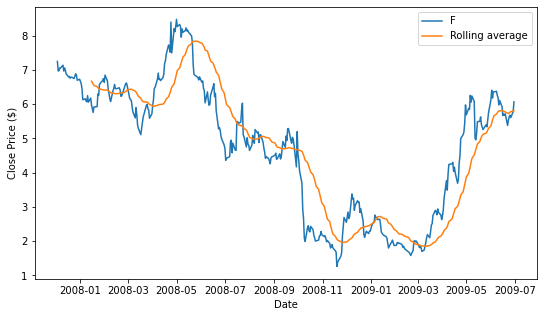

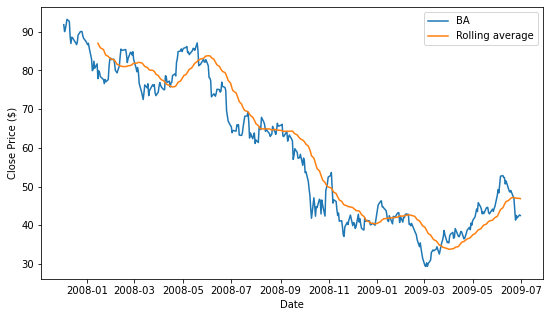

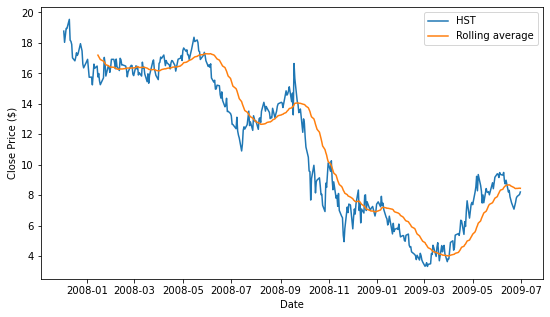

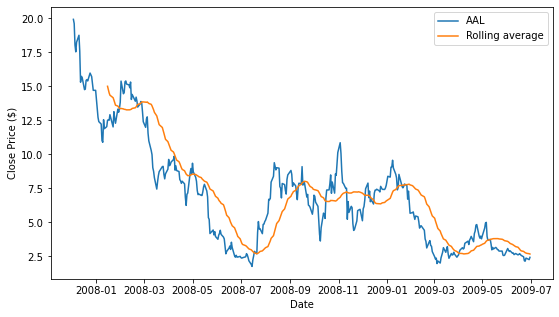

In [88]:
pickmydata(data_pack, "Close", 30)

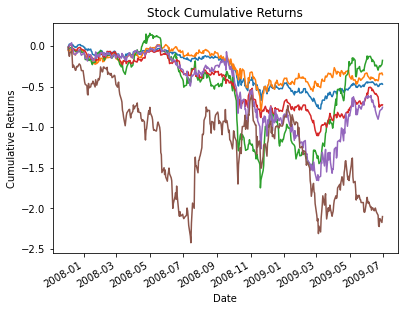

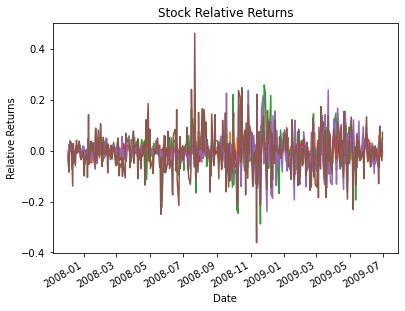

In [89]:
data_plot = stockreturns(data_pack, 'relative')
return_plot(data_plot, 'cumulative')
return_plot(data_plot, 'relative')

#### These companies have got a dip that is either as sharp or worse than the S&P 500. Unlike the discount retail companies, the industries that these commpanies belong to rely on consumer spending large amounts of money, a feature that is stressed during economic downturns. Of course it is extremely difficult to predict what type of disasted could impact the stock market tomorrow, it is still a great exercise to understand which buisness tend to weather harsh economical storms versus those who don't.